In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [13]:
f = open('./hw3dataset/graph_1.txt','r')
input = []
for line in f.readlines():
    s = line.split('\n')[0]
    s = s.split(',')
    s = tuple(s)
    input.append(s)
f.close

<function TextIOWrapper.close()>

In [14]:
G = nx.DiGraph()
G.add_edges_from(input)
print("節點個數: ",G.number_of_nodes())
print("邊的個數: ",G.number_of_edges())


節點個數:  6
邊的個數:  5


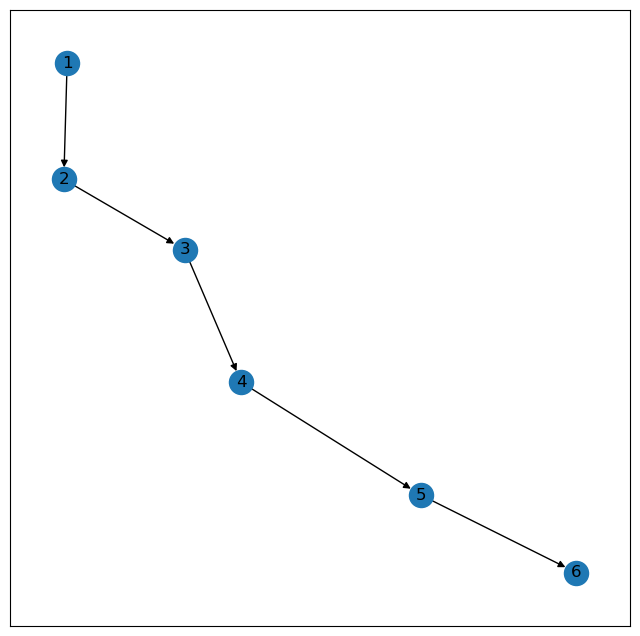

In [15]:
plt.figure(figsize =(8, 8))
nx.draw_networkx(G, with_labels = True)
plt.show()

In [16]:
def Hits(graph,iter):

    hubs = dict.fromkeys(graph,1) # 每個node都賦值1
    auth = dict.fromkeys(graph,1)

    for i in range(iter):
        lastHubs = hubs # 將上一個圖存起來
        lastAuth = auth
        hubs = dict.fromkeys(lastHubs.keys(), 0) # 將hubs清0
        auth = dict.fromkeys(lastHubs.keys(), 0) # 將auth清0
        for node in auth: # node 是 1 2 3 4 5 6
            for predecessors in graph.predecessors(node): # 找父親
                auth[node] += lastHubs[predecessors]
        for node in hubs:
            for successors in graph.successors(node): # 找兒子
                hubs[node] += lastAuth[successors] 

        auth_sum = 0
        hubs_sum = 0
        for value in auth.values():
            auth_sum += abs(value)
        for value in hubs.values():
            hubs_sum += abs(value)

        for key in auth:
            auth[key] = auth[key]/auth_sum
        for key in hubs:
            hubs[key] = hubs[key]/hubs_sum
        
    return auth, hubs

In [17]:
iter = 30
auth,hubs = Hits(G,iter)
print("auth:",auth)
print("hubs:",hubs)

auth: {'1': 0.0, '2': 0.2, '3': 0.2, '4': 0.2, '5': 0.2, '6': 0.2}
hubs: {'1': 0.2, '2': 0.2, '3': 0.2, '4': 0.2, '5': 0.2, '6': 0.0}


In [18]:
file = open("./graph_1_HITS_authority.txt","wb")
ans = []
for key,value in auth.items():
    ans.append(value)
ans = np.array(ans)
print(type(ans))
np.savetxt(file, ans,newline = ' ',fmt='%.03f')
file.close()

<class 'numpy.ndarray'>
